# Salaries in data field

In [65]:
import pandas as pd

df = pd.read_csv("../../data/salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
151440,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
151441,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
151442,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
151443,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### a) Start with some simple EDA, check summary statistics, info, columns etc

In [66]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


In [68]:
df.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
work_year,2024.435313,0.671842,2020.0,2024.0,2025.0,2025.0,2025.0
salary,162837.963135,208012.396413,14000.0,106000.0,147000.0,199000.0,30400000.0
salary_in_usd,157527.458411,74150.772377,15000.0,105800.0,146100.0,198000.0,800000.0
remote_ratio,20.938625,40.620393,0.0,0.0,0.0,0.0,100.0


In [69]:
df["salary_currency"].unique()

array(['USD', 'EUR', 'GBP', 'CAD', 'INR', 'AUD', 'PLN', 'CHF', 'SGD',
       'CZK', 'NOK', 'MXN', 'PHP', 'JPY', 'HUF', 'TWD', 'BRL', 'ZAR',
       'DKK', 'ILS', 'TRY', 'SEK', 'NZD', 'HKD', 'THB', 'CLP'],
      dtype=object)

### b) Plot the distribution of the salaries in USD.

<Axes: ylabel='Frequency'>

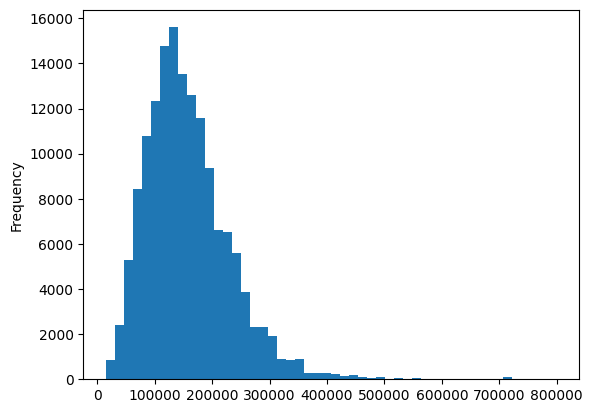

In [70]:
df["salary_in_usd"].plot(kind="hist", bins=50)

### c) How many job postings are there for each job title? Take the tenth most common job title and plot a bar chart of the number of job postings for that title.

In [71]:
import duckdb

df_postings = duckdb.query(
    """
    SELECT
        job_title,
        COUNT(*) AS postings
    FROM
        df
    GROUP BY
        job_title
    ORDER BY
        postings DESC
"""
).df()
df_postings

,job_title,postings
0,Data Scientist,18751
1,Software Engineer,16948
2,Data Engineer,16352
3,Data Analyst,13779
4,Engineer,11004
...,...,...
417,Quantitative Risk Analyst,1
418,Platform Data Engineer,1
419,Data & Analytics Analyst,1
420,BI & Data Analyst,1


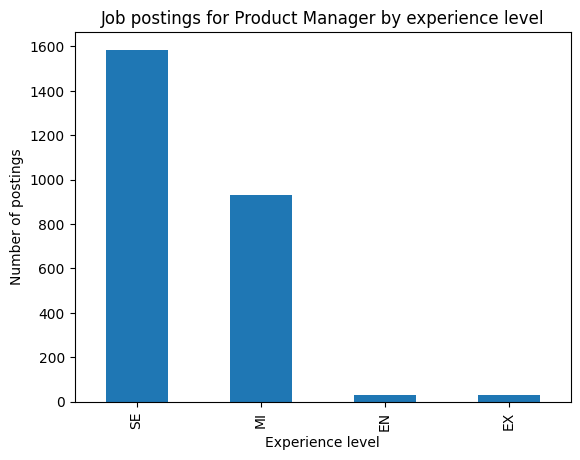

In [72]:
tenth_title = df_postings.iloc[9]["job_title"]

df_tenth_by_exp = duckdb.query(
    f"""
    SELECT
        experience_level,
        COUNT(*) AS postings
    FROM 
        df
    WHERE 
        job_title = '{tenth_title}'
    GROUP BY
        experience_level
    ORDER BY
        postings DESC
"""
).df()

ax = df_tenth_by_exp.plot(kind="bar", x="experience_level", y="postings", legend=False)
ax.set(title=f"Job postings for {tenth_title} by experience level", ylabel="Number of postings", xlabel="Experience level");

### d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. Sort the dataframe by mean_salary_sek.

In [73]:
usd_to_sek = 9.5

df_se = duckdb.query(
    f"""
    SELECT
        job_title,
        experience_level,
        MEDIAN(salary_in_usd) AS median_salary_usd,
        ROUND(MEAN(salary_in_usd), 2) AS mean_salary_usd,
        ROUND(MEAN(salary_in_usd) * {usd_to_sek}, 2) AS mean_salary_sek
    FROM
        df
    GROUP BY
        job_title, experience_level
    ORDER BY
        mean_salary_sek DESC
"""
).df()

df_se

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
0,AI Architect,MI,800000.0,800000.0,7600000.00
1,Research Team Lead,SE,450000.0,450000.0,4275000.00
2,Principal Data Scientist,EX,416000.0,416000.0,3952000.00
3,Analytics Engineering Manager,SE,399880.0,399880.0,3798860.00
4,Data Science Tech Lead,SE,375000.0,375000.0,3562500.00
...,...,...,...,...,...
932,Alternance,EN,19825.0,19825.0,188337.50
933,Stage,MI,19578.5,19578.5,185995.75
934,Data Analyst Lead,EN,18000.0,18000.0,171000.00
935,Quantitative Risk Analyst,MI,18000.0,18000.0,171000.00


### f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings

In [74]:
df_se["sek_per_month"] = df_se["mean_salary_sek"] / 12
df_se

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek,sek_per_month
0,AI Architect,MI,800000.0,800000.0,7600000.00,633333.333333
1,Research Team Lead,SE,450000.0,450000.0,4275000.00,356250.000000
2,Principal Data Scientist,EX,416000.0,416000.0,3952000.00,329333.333333
3,Analytics Engineering Manager,SE,399880.0,399880.0,3798860.00,316571.666667
4,Data Science Tech Lead,SE,375000.0,375000.0,3562500.00,296875.000000
...,...,...,...,...,...,...
932,Alternance,EN,19825.0,19825.0,188337.50,15694.791667
933,Stage,MI,19578.5,19578.5,185995.75,15499.645833
934,Data Analyst Lead,EN,18000.0,18000.0,171000.00,14250.000000
935,Quantitative Risk Analyst,MI,18000.0,18000.0,171000.00,14250.000000


<Axes: ylabel='Frequency'>

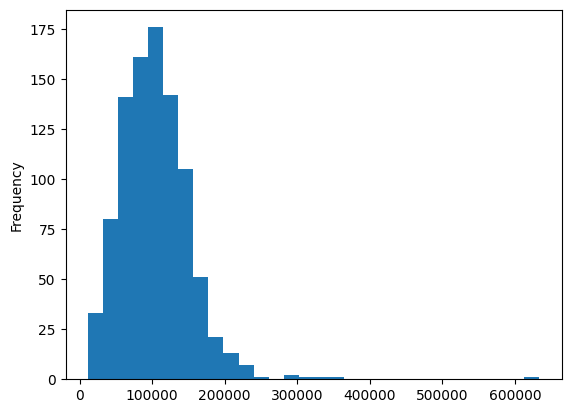

In [75]:
df_se["sek_per_month"].plot(kind="hist", bins=30)

### g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?

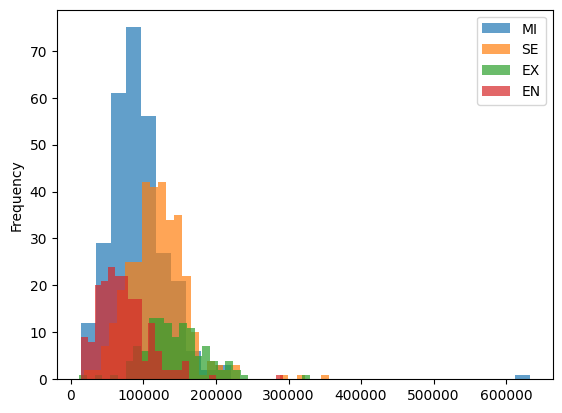

In [86]:
experience_levels = df_se["experience_level"].unique()

for level in experience_levels:
    df_se[df_se["experience_level"] == level]["sek_per_month"].plot(kind="hist", label=level, bins=30, legend=True, alpha=0.7)